# AtliQ Hotels Data Analysis Project

## This project analyzes hotel booking and performance data for AtliQ Hotels.  
## The goal is to clean and explore the data, generate insights, and support better decision-making for revenue and occupancy optimization.

## Importing Necessary Libraries
In this section, we import the required Python libraries:
- **Pandas**: For data loading, manipulation, and analysis.
- **NumPy**: For numerical computations (e.g., handling arrays).
- **Matplotlib**: For creating visualizations like charts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Import and Exploration
Here, we load the datasets and perform initial exploration to understand structure, types, and potential issues.

In [2]:
### Loading the Datasets
# Load individual datasets
df_bookings = pd.read_csv('datasets/fact_bookings.csv')  # Main bookings data
df_date = pd.read_csv('datasets/dim_date.csv')  # Dates with week/day info
df_hotels = pd.read_csv('datasets/dim_hotels.csv')  # Hotel details
df_rooms = pd.read_csv('datasets/dim_rooms.csv')  # Room categories
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')  # Aggregated stats

# We start by exploring the structure, columns, and key statistics of each dataset.

In [3]:
print("Bookings Shape:", df_bookings.shape)

Bookings Shape: (134590, 12)


In [4]:
print("Dates Shape:", df_date.shape)

Dates Shape: (92, 4)


In [5]:
print("Hotels Shape:", df_hotels.shape)

Hotels Shape: (25, 4)


In [6]:
print("Rooms Shape:", df_rooms.shape)

Rooms Shape: (4, 2)


In [7]:
print("Aggregated Bookings Shape:", df_agg_bookings.shape)

Aggregated Bookings Shape: (9200, 5)


## Exploring Bookings Data
Let's look at the main bookings dataset.

In [8]:
# First few rows
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [9]:
# Data types and missing values
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [10]:
# Summary statistics
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [11]:
# Unique values in key columns
print("Unique Room Categories:", df_bookings.room_category.unique())

Unique Room Categories: ['RT1' 'RT2' 'RT3' 'RT4']


In [12]:
print("Unique Booking Platforms:", df_bookings.booking_platform.unique())

Unique Booking Platforms: ['direct online' 'others' 'logtrip' 'tripster' 'makeyourtrip' 'journey'
 'direct offline']


In [13]:
# Value counts for platforms (for quick insights)
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

## Data Cleaning
We address issues like missing values, invalid entries, and outliers to ensure data quality.

### Handling Missing Values

In [14]:
# Check missing values
print(df_bookings.isnull().sum())

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64


In [15]:
# Impute ratings_given with mean (or drop if not critical)
df_bookings['ratings_given'] = df_bookings['ratings_given'].fillna(df_bookings['ratings_given'].mean())

# Fixing Invalid Data

In [16]:
# Remove rows with negative or zero guests (invalid)
df_bookings = df_bookings[df_bookings['no_guests'] > 0]

In [17]:
# Convert dates to datetime for consistency
df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'], errors='coerce')

In [18]:
# Ensure date is in datetime format
df_date['date'] = pd.to_datetime(df_date['date'], format='%d-%b-%y', errors='coerce')

# Create mmm yy column (e.g., "May 22")
df_date['mmm yy'] = df_date['date'].dt.strftime('%b %y')

# Create week no column (e.g., "W 19")
df_date['week no'] = "W " + df_date['date'].dt.isocalendar().week.astype(str)

# Create day_type column (weekend vs weekday)
df_date['day_type'] = df_date['date'].dt.dayofweek.apply(lambda x: 'weekend' if x >= 5 else 'weekday')

# Check results
print(df_date.head())

        date  mmm yy week no day_type
0 2022-05-01  May 22    W 17  weekend
1 2022-05-02  May 22    W 18  weekday
2 2022-05-03  May 22    W 18  weekday
3 2022-05-04  May 22    W 18  weekday
4 2022-05-05  May 22    W 18  weekday


In [19]:
avg, std = df_bookings.revenue_realized.mean(), df_bookings.revenue_realized.std()
higher_limit = avg + 3*std
lower_limit = avg - 3*std
higher_limit, lower_limit

(np.float64(33480.44762788103), np.float64(-8088.201116253131))

In [20]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.000000,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3.619004,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.000000,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,3.619004,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.000000,Checked Out,10920,10920


# Displays bookings where revenue realized exceeds the higher limit.

In [21]:
df_bookings = df_bookings[df_bookings.revenue_generated < higher_limit]

## Data Transformation
We merge datasets and create new features for deeper analysis.

### Merging Datasets

In [22]:
# Merge bookings with hotels on property_id
df_bookings_all = pd.merge(df_bookings, df_hotels, on='property_id')

In [23]:
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.000000,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3.619004,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.000000,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,3.619004,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.000000,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [24]:
df_date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 17,weekend
1,2022-05-02,May 22,W 18,weekday
2,2022-05-03,May 22,W 18,weekday
3,2022-05-04,May 22,W 18,weekday
4,2022-05-05,May 22,W 18,weekday


In [25]:
# Merge with dates on check_in_date == date
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on='check_in_date', right_on='date')

In [26]:
# Display merged head
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.000000,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 17,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3.619004,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 17,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.000000,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 17,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,3.619004,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 17,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.000000,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 17,weekend


We created new features to help with analysis:
- Stay duration (nights)  
- Revenue per guest

In [27]:
# Stay duration (assuming checkout_date is datetime—convert if needed)
df_bookings_all['checkout_date'] = pd.to_datetime(df_bookings_all['checkout_date'], errors='coerce')

In [28]:
df_bookings_all['stay_duration'] = (df_bookings_all['checkout_date'] - df_bookings_all['check_in_date']).dt.days

In [29]:
# Revenue per guest
df_bookings_all['revenue_per_guest'] = df_bookings_all['revenue_realized'] / df_bookings_all['no_guests']

In [30]:
df_bookings_all.groupby('mmm yy')['revenue_realized'].sum()

mmm yy
Jul 22    554538134
Jun 22    535358791
May 22    563201226
Name: revenue_realized, dtype: int64

## Insights Generation
We derive key insights through metrics and visualizations.

In [31]:
### Key Metrics
total_revenue = df_bookings_all['revenue_realized'].sum()
avg_rating = df_bookings_all['ratings_given'].mean()
print("Total Realized Revenue:", total_revenue)

Total Realized Revenue: 1653098151


In [32]:
print("Average Rating:", avg_rating)

Average Rating: 3.618149589834043


In [33]:
# Calculate cancellation rate
total_bookings = len(df_bookings)
cancelled_bookings = len(df_bookings[df_bookings['booking_status'] == 'Cancelled'])
cancellation_rate = (cancelled_bookings / total_bookings) * 100
print(f"Total Bookings: {total_bookings:,}")
print(f"Cancelled Bookings: {cancelled_bookings:,}")
print(f"Cancellation Rate: {cancellation_rate:.2f}%")
# Insight: A ~{cancellation_rate:.2f}% cancellation rate indicates significant revenue loss, critical for the Revenue Manager to address.

Total Bookings: 132,861
Cancelled Bookings: 32,991
Cancellation Rate: 24.83%


## Revenue by Booking Platform (Pie Chart)

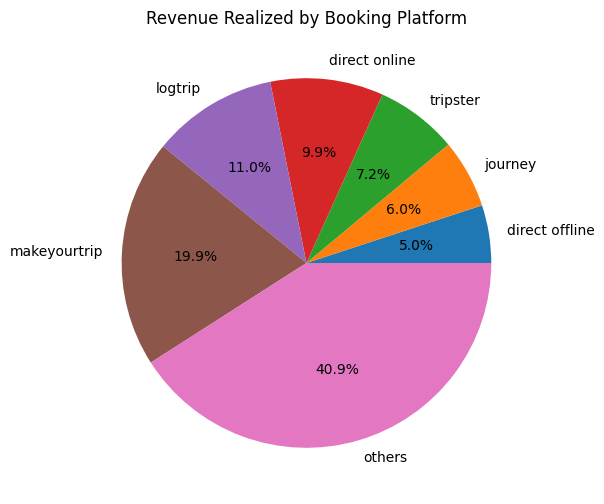

In [34]:
# Group and sort
platform_revenue = df_bookings_all.groupby('booking_platform')['revenue_realized'].sum().sort_values()
plt.figure(figsize=(8, 6))
plt.pie(platform_revenue, labels=platform_revenue.index, autopct='%1.1f%%')
plt.title('Revenue Realized by Booking Platform')
plt.show()

## Revenue by City and Month (Bar Chart)

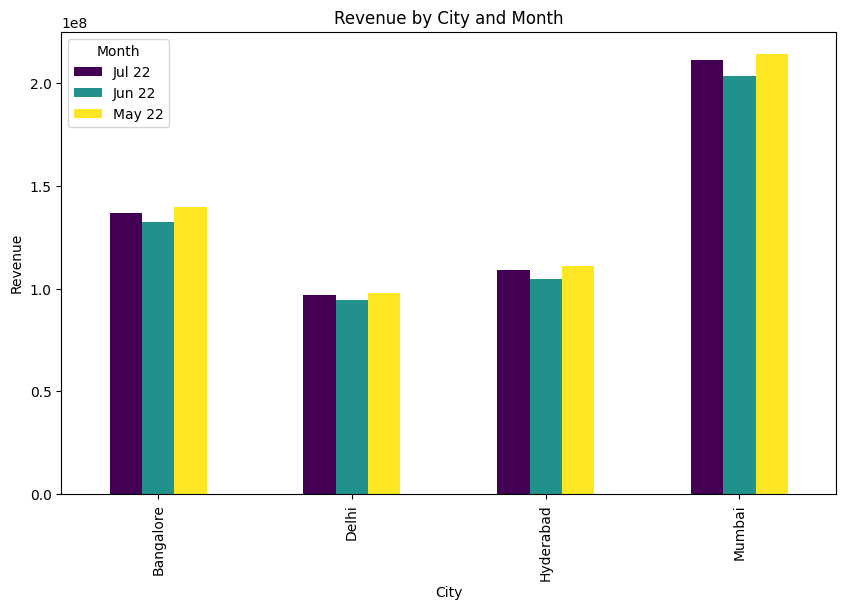

In [35]:
# Assuming df_bookings_all from Data Transformation
city_month_revenue = df_bookings_all.groupby(['city', 'mmm yy'])['revenue_realized'].sum().unstack()
city_month_revenue.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Revenue by City and Month')
plt.ylabel('Revenue')
plt.xlabel('City')
plt.legend(title='Month')
plt.show()

## Weekend vs. Weekday trends.

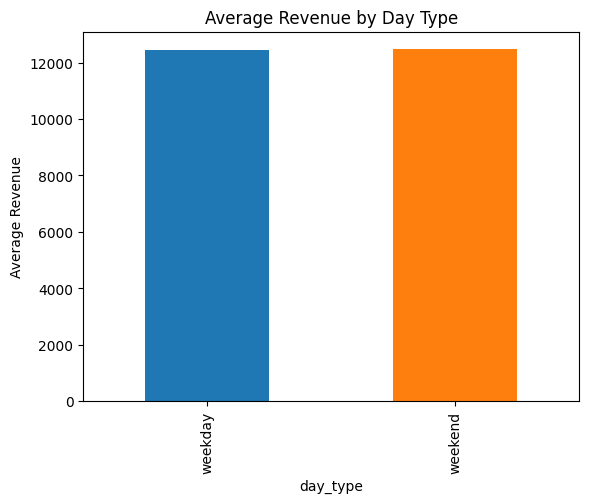

In [36]:
df_bookings_all.groupby('day_type')['revenue_realized'].mean().plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Average Revenue by Day Type')
plt.ylabel('Average Revenue')
plt.show()

### Correlation Analysis
Correlation measures how `revenue_realized` and `ratings_given` are related. A value near 0 means little connection, which helps the Revenue Manager decide if improving guest satisfaction directly impacts revenue.

In [37]:
# Calculate and display correlation
correlation_matrix = df_bookings[['revenue_realized', 'ratings_given']].corr()
print("Correlation between Revenue and Ratings:")
print(correlation_matrix)

Correlation between Revenue and Ratings:
                  revenue_realized  ratings_given
revenue_realized           1.00000       -0.00121
ratings_given             -0.00121        1.00000


## Conclusion and Recommendations
### Summary
- Total revenue: 1659219951.
- Key trend: Decline possibly due to cancellations (24.83%% rate).
- For Revenue Manager: Focus on high-revenue platforms.
- For Operations Manager: Improve occupancy in low-performing cities.

### Recommendations
- Reduce cancellations with better policies.
- Marketing for underperforming months.

### Limitations
- Data limited to 3 months; more needed for seasonality.

### Future Work
- Machine learning for revenue forecasting.